In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("./creditcard.csv")

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(dataset.drop(['Class'],axis=1))
y = dataset['Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [7]:
X_test[1].shape

(30,)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

encoder = Sequential([
    layers.Input(shape = (30,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

decoder = Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(30, activation='linear')  # Using 'linear' activation for reconstruction
])

autoencoder = Sequential([
    encoder,
    decoder
])

In [9]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train,X_train, epochs=7, batch_size = 32,validation_data=(X_test,Y_test))

Epoch 1/7
7121/7121 [==============================] - 37s 5ms/step - loss: 0.3100 - accuracy: 0.5705 - val_loss: 0.8280 - val_accuracy: 0.0693
Epoch 2/7
7121/7121 [==============================] - 36s 5ms/step - loss: 0.1402 - accuracy: 0.7113 - val_loss: 0.8916 - val_accuracy: 0.0440
Epoch 3/7
7121/7121 [==============================] - 35s 5ms/step - loss: 0.0966 - accuracy: 0.7601 - val_loss: 0.9025 - val_accuracy: 0.0681
Epoch 4/7
7121/7121 [==============================] - 35s 5ms/step - loss: 0.0777 - accuracy: 0.7861 - val_loss: 0.9122 - val_accuracy: 0.0635
Epoch 5/7
7121/7121 [==============================] - 35s 5ms/step - loss: 0.0716 - accuracy: 0.7972 - val_loss: 0.9273 - val_accuracy: 0.0581
Epoch 6/7
7121/7121 [==============================] - 34s 5ms/step - loss: 0.0671 - accuracy: 0.8030 - val_loss: 0.9471 - val_accuracy: 0.0229
Epoch 7/7
7121/7121 [==============================] - 36s 5ms/step - loss: 0.0627 - accuracy: 0.8095 - val_loss: 0.9236 - val_accuracy:

In [11]:
y_pred = autoencoder.predict(X_test)

1781/1781 [==============================] - 6s 3ms/step


In [12]:
import numpy as np
mean_squared_error = np.mean(np.power(X_test - y_pred,2) ,axis=1)

In [15]:
mean_squared_error

array([0.00940959, 0.04060172, 0.01807319, ..., 0.00417586, 0.02640071,
       0.04265065])

In [16]:
import matplotlib.pyplot as plt

(array([5.6755e+04, 1.5200e+02, 3.1000e+01, 1.4000e+01, 5.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.75876420e-03, 1.29925955e+00, 2.59676033e+00, 3.89426112e+00,
        5.19176190e+00, 6.48926268e+00, 7.78676347e+00, 9.08426425e+00,
        1.03817650e+01, 1.16792658e+01, 1.29767666e+01]),
 <BarContainer object of 10 artists>)

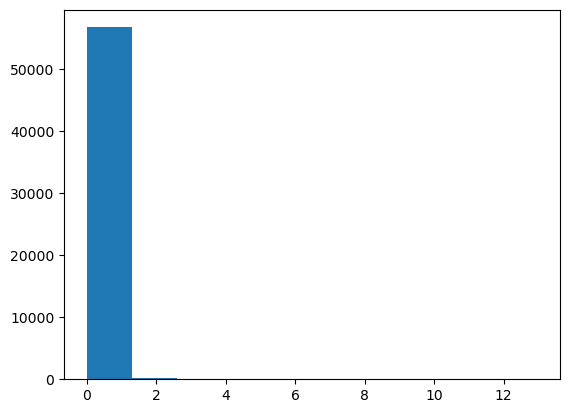

In [17]:
plt.hist(mean_squared_error)

In [23]:
# Threshold tuning (iterate and adjust as needed)
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the step size as needed

for threshold in thresholds:
    anomalies = mean_squared_error > threshold

In [27]:
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 355


In [36]:
from sklearn.metrics import confusion_matrix
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, anomalies))


Confusion Matrix:
[[56534   322]
 [   73    33]]


<Axes: >

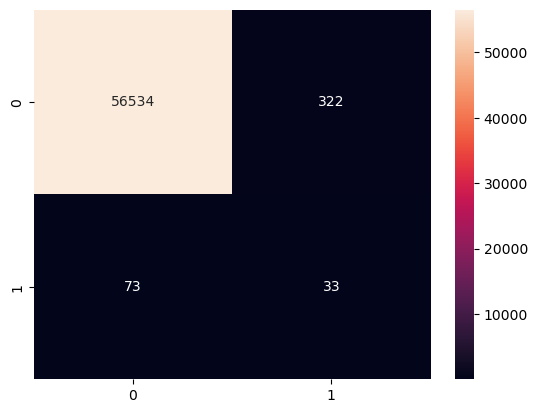

In [40]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,anomalies), annot=True, fmt='d')